<div class="frontmatter text-center">
<h1> MATH5027 Scientific Python</h1>
<h3>Central European University, Fall 2017/2018</h3>
<h3>Instructor: Prof. Roberta Sinatra, TA: Johannes Wachs</h3>
</div>



### Today's plan:
Talk about networks and explore the module networkx

## Crash course on Networks (mainly Jargon :-( )

Networks/graphs are (1) a set of objects (called nodes or vertices), (2) relationships between those objects (called links or edges)

<img src="http://connectedthebook.com/images/links/social_networks2.gif" alt="a Network" style="width:304px;height:228px;">


Types of graphs:
* **Undirected** or **directed** networks. The friendship network in Facebook is an example of an undirected graph, twitter is a directed graph.
* **Unweighted** or **weighted**: the friendship network in Facebook is unweighted, the airport network (nodes: airports, links: number of airplanes flying between two airports) is weighted. 

Jargon:
* Node $j$ is a **neighbor** of node $i$ if the edge $(i,j)$ exists. The **neighborhood** of $i$ is the set of all $i$'s neighbors.
* The **degree** of $i$ is the number of its neighbors. The **degree distribution** $P(k)$ is the probability that a randomly chosen node in the network has degree $k$.
* **Hubs** are nodes with very high degree. In many networks (the Internet, social networks, etc.) they are rare but much more common than you may expect.
* **Sparse**: Most pairs of nodes do not have a link. Real-world networks are of this kind.
* A **path** between two nodes, say $i$ and $j$, is the series of nodes that you need to traverse in order to get from $i$ to $j$ (and from $j$ to $i$ in case of undirected graphs).
* The **distance** between nodes $i$ and $j$ is the length of the *shortest path* between them. The **diameter** of a network is the *longest* shortest path.
* **Clustering coefficient** $c_i$ of node $i$ is the fraction of neighbors of $i$ that are linked: 

$$c_i = \frac{T_i}{\binom{k_i}{2}} = \frac{2T_i}{k_i(k_i-1)}$$

where $T_i$ is the number of triangles through node $i$. In simple words it quantifies how many of $i$'s friends also know each other.

Specific graphs:
* **Complete graphs**: every link exists $\binom{n}{2}$ links for $n$ nodes.
* **Lattices**
* **Erdős-Rényi** graphs
* Many more



# Networkx
[NetworkX](http://networkx.github.io/) is a very thorough and very mature network science package for python.

* It's not the fastest code on the planet, but it's very well documented and fairly easy to use!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
nicered = "#E6072A"
niceblu = "#424FA4"
nicegrn = "#6DC048"

In [2]:
import networkx as nx

Networkx defines a **graph object** that we can work with. Internally it's very similar to a dictionary of dictionaries to store nodes and their attributes, and to a dictionaries of lists to store links. It provides a number of methods for making changes to the graph.

In [29]:
g = nx.Graph() # empty graph

In [30]:
g.is_directed() #by default a graph is indirected

False

If you want to create a graph directed graph|:

In [31]:
g_directed=nx.DiGraph()

In [32]:
g_directed.is_directed()

True

Nodes can be almost anything, including numbers, strings, GPS coordinates, you name it.

In [33]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0



The graph g can be grown in several ways. For example one node at a time:

In [34]:
g.add_node(1) # method of nx.Graph

In [35]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 1
Number of edges: 0
Average degree:   0.0000


A list of nodes

In [36]:
g.add_nodes_from([2 ,3]) 

In [37]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 0
Average degree:   0.0000


A container of nodes

In [38]:
h = nx.path_graph(10)

In [39]:
print(nx.info(h))

Name: path_graph(10)
Type: Graph
Number of nodes: 10
Number of edges: 9
Average degree:   1.8000


In [51]:
g.add_nodes_from(h) # g now contains the nodes of h

In [47]:
z = nx.Graph()

z.add_edges_from(h)
print(nx.info(z))

TypeError: object of type 'int' has no len()

In [52]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 0
Average degree:   0.0000


You can also remove nodes:

In [53]:
g.remove_node(2)

In [54]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 0
Average degree:   0.0000


In [55]:
print(g.nodes())

[1, 3, 0, 4, 5, 6, 7, 8, 9]


## Edges

An edge between node1 and node2 is represented by a tuple (node1, node2)  
They can be added one at a time:

In [56]:
# add edge between node 0 and node 1
g.add_edge(0, 1)

Or many at once from a container

In [57]:
edge_list = [(2, 1), ("Mary", "Alice"), (3, 4), (2,3), (1,3) ]
g.add_edges_from(edge_list)

**Note:** Nodes will be automatically created if they don't already exist.

## Basic operations
### Network size

In [58]:
# number of nodes
print(g.number_of_nodes())

# or
print(len(g))

# number of edges
print(g.number_of_edges())

12
12
6


### Testing to see whether nodes or edges exist

In [59]:
print(g.has_node("Johannes"))

False


### Finding neighbors of a node

In [60]:
print(g.neighbors(1))

[0, 2, 3]


### Iterating over nodes and edges
Nodes and edges can be iterated over with `G.nodes()`/`G.nodes_iter()` and `G.edges()`/`G.edges_iter()` respectively  
***Note***: The `_iter` versions return iterators as opposed to lists, and so it's best form to use them for large networks.

In [63]:
for node, data in g.nodes_iter(data=True): # data=True includes node attributes as dictionaries
    print(node, data) 

1 {}
3 {}
0 {}
4 {}
5 {}
6 {}
7 {}
8 {}
9 {}
2 {}
Mary {}
Alice {}


In [64]:
for n1, n2, data in g.edges_iter(data=True):
    print(n1, " <----> ", n2, data)

1  <---->  0 {}
1  <---->  2 {}
1  <---->  3 {}
3  <---->  4 {}
3  <---->  2 {}
Mary  <---->  Alice {}


### Calculating topological properties

In [65]:
# one node
print(g.degree("Mary")) # returns an integer

# all nodes (returns a dictionary with node : degree pairs for all nodes)
print(g.degree())

# just the degree values
print(g.degree().values())

1
{1: 3, 3: 3, 0: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 2: 2, 'Mary': 1, 'Alice': 1}
dict_values([3, 3, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1])


In [66]:
g.add_edge('Alice','Johannes')
nx.clustering(g)

{1: 0.3333333333333333,
 3: 0.3333333333333333,
 0: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 2: 1.0,
 'Mary': 0.0,
 'Alice': 0.0,
 'Johannes': 0.0}

## Other operations
There are a lot of operations included in networkx. If you work with networks, or you plan to, make sure you explore the documentation. Below there is a selection of useful operations. Take note of G.copy() (this is the way to create the deep copy of a graph!) 

* ***`subgraph(G, nbunch)` or `G.subgraph(nbunch)`***       
subgraph of G induced by nodes in nbunch    

* ***`reverse(G)`***       
DiGraph with edges reversed 

* ***`union(G1, G2)`***      
graph union    

* ***`disjoint_union(G1, G2)`***     
same, but treats nodes of G1, G2 as different 

* ***`intersection(G1, G2)`***      
graph with only the edges in common between G1, G2

* ***`difference(G1, G2)`***      
graph with only the edges G1 that aren't in G2

* ***`copy(G)` or `G.copy()`***     
copy of G

* ***`complement(G)` or `G.complement()`***     
the complement graph of G 

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
undirected version of G (a Graph or MultiGraph)  

* ***`convert_to_directed(G)` or `G.to_directed()`***      
directed version of G (a DiGraph of MultiDiGraph)

* ***`adjacency_matrix(G)`***      
adjacency matrix A of G (in sparse matrix format; to get full matrix, use A.toarray() )

# Graph I/O
In many case you will not be building a network from scratch one node/link at a time. Instead, you will want to read it in from an appropriate data file. NetworkX can understand the following common graph formats:
* edge lists
* adjacency lists
* GML
* GEXF
* Python 'pickle'
* GraphML
* Pajek
* LEDA
* YAML


## Example
We want to read in the edge list `data/test.txt`  with the following options
* lines starting with `#` are treated as comments and ignored  
* use a `Graph` object to hold the data (i.e., network is undirected)  
* data are separated by whitespace (' ')
* nodes should be treated as integers (`int`)
* encoding of the text file containing the edge list is utf-8

We accomplish this by doing:

In [67]:
G = nx.read_edgelist('data/test.txt', comments='#', create_using=nx.Graph(), delimiter=' ', nodetype=int, encoding='utf-8')

In [68]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 99
Number of edges: 240
Average degree:   4.8485


## Simple network drawing
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi (a network visualization software), but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

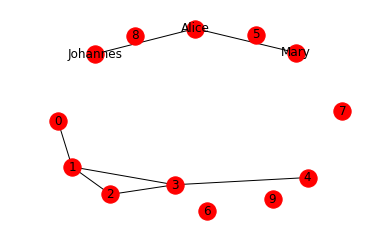

In [69]:
fig=plt.figure(figsize=(6,4))
plt.axis('off')
nx.draw_networkx(g)

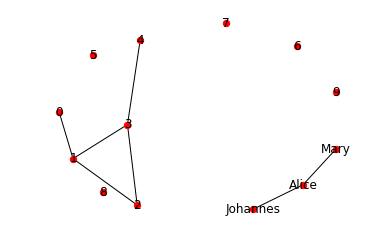

In [70]:
fig=plt.figure(figsize=(6,4))
plt.axis('off')
nx.draw_networkx(g,with_labels=True, node_size=40 )

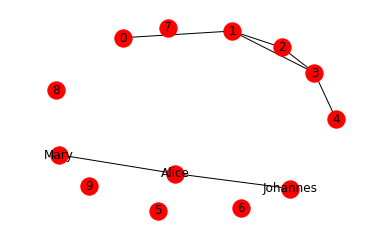

In [71]:
fig=plt.figure(figsize=(6,4))
plt.axis('off')
nx.draw_networkx(g,pos=nx.spring_layout(g))

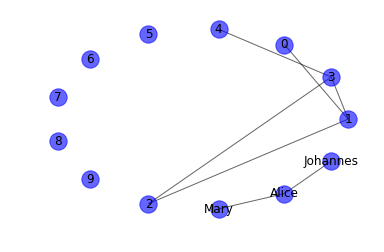

In [72]:
fig=plt.figure(figsize=(6,4))
plt.axis('off')
nx.draw_networkx(g,pos=nx.circular_layout(g), node_color='b', alpha=0.6)

## Degree distributions from Hungarian networks!

The **Erdős–Rényi (ER) model** is a model to generate random graphs. In one of the variants of the model, a graph is constructed by connecting nodes randomly. That is, given $N$ nodes, each possible pair of nodes is connected with probability $p$ (indipendent of all other existing edges).

* ** Exercise**: Create a function ```myERgraph``` which takes as input the number of nodes ```N``` and a probability ```p```, and returns an Erdős–Rényi graph 

It's a good exercise to be able to write the code for an ER network. However, in networkx there are also functions to generate networks automatically. For example, an ER graph can be created with the function `erdos_renyi_graph`:
<img src="ER_networkx.png", height="500" width="500">

In [73]:
ER_graph=nx.erdos_renyi_graph(1000, 0.09)

In [74]:
ER_degrees=nx.degree(ER_graph)

In [75]:
type(ER_degrees)

dict

In [76]:
ER_degrees[0:20] # number of edges from the first 21 nodes

TypeError: unhashable type: 'slice'

In [77]:
for i in range(0,20):
    print(i, ER_degrees[i])

0 88
1 80
2 86
3 104
4 70
5 82
6 95
7 90
8 102
9 95
10 84
11 85
12 102
13 97
14 103
15 87
16 90
17 80
18 90
19 94


In [78]:
ER_degrees=np.array(list(ER_degrees.values()))

In [79]:
type(ER_degrees)

numpy.ndarray

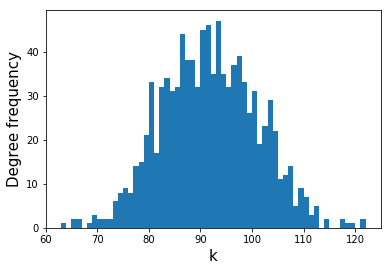

In [80]:
plt.hist(ER_degrees, bins=max(ER_degrees)-min(ER_degrees))
plt.xlabel('k', fontsize=15)
plt.ylabel('Degree frequency', fontsize=15)
plt.show()

In [15]:
ER_hist, bin_edges= np.histogram(ER_degrees, bins=max(ER_degrees)-min(ER_degrees), density=True)

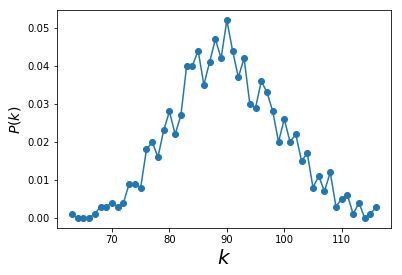

In [17]:
plt.plot(bin_edges[:-1],ER_hist,'o-')
plt.xlabel(r'$k$', fontsize=20)
plt.ylabel(r'$P\left( k \right)$', fontsize=14)
plt.show()

From the theory, the degree distribution of an ER graph is binomial, or for very large graphs, poissonian.
* **Exercise**: Increase the size of your network, and plot again the degree distribution. Make sure to choose `p` such that $N*p\simeq 10$.

Another famous network model is the ```Barabási-Albert (BA)``` (do you see a nationality pattern here?). This is a network growth model, that starts with a small core of all-connected nodes and adds one node at a time. The new node comes in with $m$ links, which it attaches preferentially to nodes with high degree. If you want to know more, look it up [ here](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model).
* Generate three BA network with 1000 nodes, but all different $m$. Choose $m$ such that $2m=\langle k\rangle_{ER}$ where $\langle k\rangle_{ER}$ is the average degree of your ER network (in the example above, the $\langle k\rangle_{ER}=10$. 
* Compare (plot them together) the degree distribution of one of these BA networks with the "corresponding" ER network (corresponding in the sense that they have the same average degree). What do you notice?

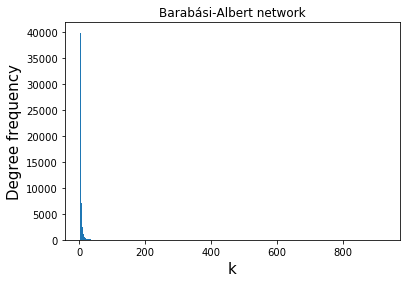

In [18]:
# 1 Generate three BA networks

nodes = 100000
m = 3
seed = 50
BA1 = nx.barabasi_albert_graph(nodes, m, seed)

BA_degrees=nx.degree(BA1)
BA_degrees=np.array(list(BA_degrees.values()))

plt.hist(BA_degrees, bins=max(BA_degrees)-min(BA_degrees))
plt.xlabel('k', fontsize=15)
plt.ylabel('Degree frequency', fontsize=15)
plt.title("Barabási-Albert network")
plt.show()

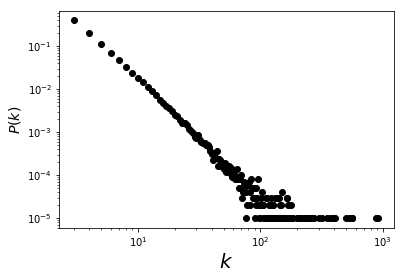

In [19]:
BA_hist, bin_edges= np.histogram(BA_degrees, bins=max(BA_degrees)-min(BA_degrees), density=True)

plt.plot(bin_edges[:-1],BA_hist,'ko')
plt.xlabel(r'$k$', fontsize=20)
plt.ylabel(r'$P\left( k \right)$', fontsize=14)
plt.loglog()
plt.show()

## Wikipedia page networks
In the example and exercises below, we will obtain and analyze the ***ego-network*** of different Wikipedia pages. An ego-network is the network of links among neighbors of a single node (the ego). For example, if the Wikipedia page "Python" (ego) links to "Programming Languages","Computer", and "Snake", we are interested in the links between the three other pages (i.e. between "Snake "and "Computer", "Programming Languages "and "Computer", "Snake "and "Programming Languages").

This is a multi-step problem:

1) Write a function that takes a url and returns all the links in that page as a list **(code provided)**.

2) Pick an ego page: we will work with the wikipedia page on Network Science, but you can choose later other ones. We run the function you defined in 1) to get the neighbors of your ego. This might take some minutes, so be wise if you change page **(code provided)**.

3) Create an empty networkx DiGraph and loop over the list of neighbors, adding them as directed edges from ego to neighbor **(code provided)**.

4) For each neighbor, get all of its links, keeping only those present in the list of neighbors of the ego. Add each link as a directed edge to your graph **(Exercise! You write the code. Be careful with testing - see below)**

5) Draw and analyze your graph. You may want to remove the ego. Which nodes have the largest in_degree? Write in a file named ```sorted_ego_indegree_<nameofthepage>.txt```(e.g. ```sorted_ego_indegree_Network_Science.txt``` ) where each line is one of the neighbors of the base page and its indegree, sorted by indegree, from largest to smallest.  **(Exercise! You write the code)**

6) Look up the PageRank algorithm in the networkx documentation. Run it and see which nodes are most important according to this measure. Create a scatterplot where you use in-degree on one axis, and pagerank on the other axis. 
**(Exercise! You write the code)**


In [20]:
import re # this stands for "regular expressions" and is a more advanced module to manage strings and patterns. 
            #Look into it if you are interested
import urllib.request

We write a function that takes a url and returns all the links in that page as a list. You have all the information to understand the code below. Just some hints for the undetstanding:
 - Hint 1: it gets the html as a string and split on '<a href='.
 - Hint 2: it includes only links internal to Wikipedia (the first characters in the link will be "/wiki"
 - Hint 3: it excludes links containing ':' - these are "meta" pages on Wikipedia like the talk pages.

In [86]:
#define a function to get the links from a downloaded html string
def get_links(url):
    '''pass a url and return a list of wikipedia links'''
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    base=result.read()
    base=str(base)
    splitting=base.split('<a href=') 
    links=[]
    for nn in splitting:
        #use a regular expression to pick out the wikipedia internal links
        link=[x for x in re.findall('"([^"]*)"',nn) if x[0:5]=='/wiki']
        if len(link)>0:
            #links containing : are general wikipedia pages that we want to skip
            if ':' in link[0]:
                pass
            else:
                links.append('https://en.wikipedia.org'+link[0])
    #take the set to remove duplicates
    return list(set(links))

In [85]:
base_page = 'https://en.wikipedia.org/wiki/Network_science'
first_neighbors = get_links(base_page)
some_first_neighbors = first_neighbors[0:10]
sorted(first_neighbors)

['https://en.wikipedia.org/wiki/Adjacency_list',
 'https://en.wikipedia.org/wiki/Adjacency_matrix',
 'https://en.wikipedia.org/wiki/Agent-based_model',
 'https://en.wikipedia.org/wiki/Albert-L%C3%A1szl%C3%B3_Barab%C3%A1si',
 'https://en.wikipedia.org/wiki/Alfr%C3%A9d_R%C3%A9nyi',
 'https://en.wikipedia.org/wiki/ArXiv',
 'https://en.wikipedia.org/wiki/Army_Research_Laboratory',
 'https://en.wikipedia.org/wiki/Artificial_neural_network',
 'https://en.wikipedia.org/wiki/Assignment_problem',
 'https://en.wikipedia.org/wiki/Assortative_mixing',
 'https://en.wikipedia.org/wiki/Assortativity',
 'https://en.wikipedia.org/wiki/Balance_theory',
 'https://en.wikipedia.org/wiki/Bank',
 'https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model',
 'https://en.wikipedia.org/wiki/Betweenness_centrality',
 'https://en.wikipedia.org/wiki/Bibcode',
 'https://en.wikipedia.org/wiki/Binomial_coefficient',
 'https://en.wikipedia.org/wiki/Biological_network',
 'https://en.wikipedia.org/wiki/Bipartite_

In [102]:
#declare your starting page
base_page = 'https://en.wikipedia.org/wiki/Network_science'

#get the neighbors of your base page
first_neighbors = get_links(base_page)

#create a networkx DiGraph object and add the edges from the base_page to the neighbors
D=nx.DiGraph()
for page in first_neighbors:
    D.add_edge(base_page,page)

At the moment the network looks like a star, with all elements in first_neighbors being connected to the central base_page:

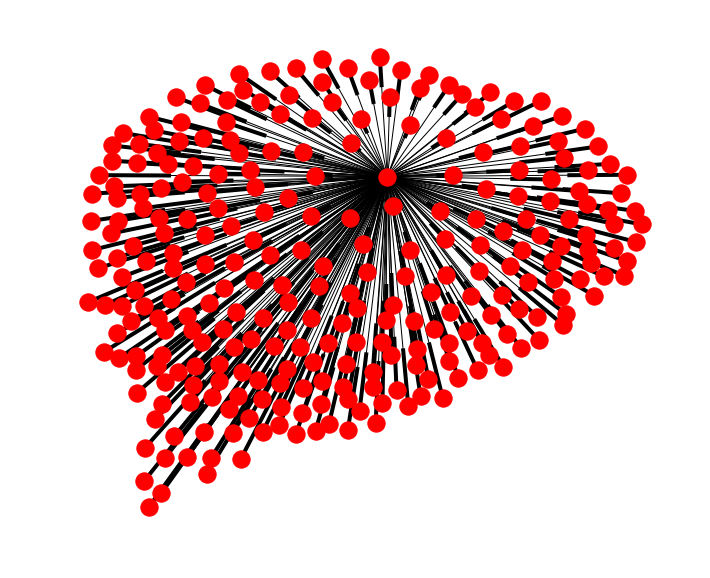

In [27]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(D, with_labels=False)
plt.show()

What we (you!) have to do now is to add links between the neighbors, based on the content in their wikipedia page. This is the objective of the first exercise below.

* **Exercise**: Write code that, for each neighbor, gets all of its links, keeping only those that are present in the list of neighbors of the ego. That is, if a neighbor has links to, say, 'https://en.wikipedia.org/wiki/Social_graph' and 'https://en.wikipedia.org/wiki/Orange_(fruit)', but only Social_graph is in first_neighbors, you will add only the link to Social_graph.
Add each link as a directed edge to your graph.
**IMPORTANT**: this code may be slow, since there are a a lot of neighbors and potentially there can be links between all of them. Test your code getting links only for a subset of neighbors, say no more than 10. When it works, run it for all links.

* **Exercise**:  Draw and analyze your graph. You may want to remove the ego. Which nodes have the largest in_degree? Write in a file named ```sorted_ego_indegree_<nameofthepage>.txt```(e.g. ```sorted_ego_indegree_Network_Science.txt``` ) where each line is one of the neighbors of the base page and its indegree, sorted by indegree, from largest to smallest.  

* **Exercise**:  Look up the PageRank algorithm in the networkx documentation. Run it and see which nodes are most important according to this measure. Create a scatterplot where you use in-degree on one axis, and pagerank on the other axis. 


-----------------------------------------------------------------------------------------------------------------------

* **Exercise**: Write code that, for each neighbor, gets all of its links, keeping only those that are present in the list of neighbors of the ego. That is, if a neighbor has links to, say, 'https://en.wikipedia.org/wiki/Social_graph' and 'https://en.wikipedia.org/wiki/Orange_(fruit)', but only Social_graph is in first_neighbors, you will add only the link to Social_graph.
Add each link as a directed edge to your graph.
**IMPORTANT**: this code may be slow, since there are a a lot of neighbors and potentially there can be links between all of them. Test your code getting links only for a subset of neighbors, say no more than 10. When it works, run it for all links.

In [103]:
for child_page in first_neighbors:
    child_first_neighbors = get_links(child_page)
    for element in child_first_neighbors:
        if element in first_neighbors:
            D.add_edge(child_page, element)

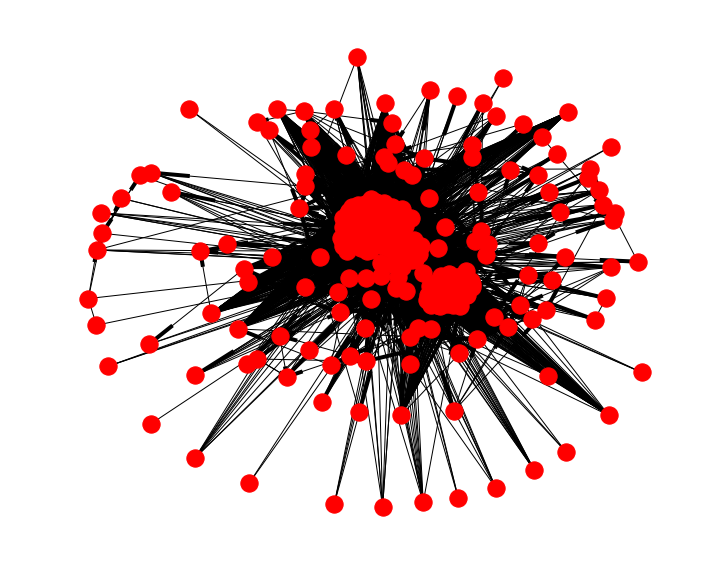

In [104]:
D.remove_node(base_page)
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(D, with_labels=False)
plt.show()

---------------------------------------------------------------------------------------------------------------------------

 Draw and analyze your graph. You may want to remove the ego. Which nodes have the largest in_degree? Write in a file named ```sorted_ego_indegree_<nameofthepage>.txt```(e.g. ```sorted_ego_indegree_Network_Science.txt``` ) where each line is one of the neighbors of the base page and its indegree, sorted by indegree, from largest to smallest.  

For example, the visualization of the Network science wikipedia page looks like:
<img src="netscience_wikip_net.png", alt='Network Science in wikipedia', height="500" width="500">

In [105]:
D_indegrees=nx.degree(D)

In [154]:
PG = nx.pagerank(D)
page_rank = []
for key in PG:
    page_rank.append((key, PG[key]))
page_rank= sorted(page_rank, key = lambda x: x[1], reverse= True )
page_rank[0:10]

[('https://en.wikipedia.org/wiki/Main_Page', 0.40156454463335384),
 ('https://en.wikipedia.org/wiki/International_Standard_Book_Number',
  0.03662285801568062),
 ('https://en.wikipedia.org/wiki/Digital_object_identifier',
  0.036415471739485956),
 ('https://en.wikipedia.org/wiki/International_Standard_Serial_Number',
  0.02393194534753384),
 ('https://en.wikipedia.org/wiki/PubMed_Central', 0.01724781026787401),
 ('https://en.wikipedia.org/wiki/PubMed_Identifier', 0.01240550166814919),
 ('https://en.wikipedia.org/wiki/Bibcode', 0.01194961090546777),
 ('https://en.wikipedia.org/wiki/Graph_theory', 0.00860731057291846),
 ('https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)',
  0.006499061994349211),
 ('https://en.wikipedia.org/wiki/Mathematics', 0.006129596944298909)]

If you have in mind a wikipedia page that does not have many neighbors, you can try to visualize it, displaying the labels of the pages. See if you find some interesting relations!

For you to know, nodes and edges can have attributes. For example, a node can be associated with a color (that you could use for example for a customized plotting), and an edge could be associated with a weight (that for example you could use to set the width of links in a visualization). In Networkx handling attributes is very easy. 

## Node attributes
Nodes can have arbitrary attributes, which are indexed by strings.

Adding attributes at the time of node creation using keyword arguments:

In [16]:
g.add_node("Mary", eye_color='brown', height=5.4)

You can also add attributes to an already existing node

In [17]:
g.add_node("Einstein")

# add an attribute "citations" with value 10**6 to Einstein
g.node["Einstein"]["citations"] = 10**6

In [18]:
print("Mary's eyes are ", g.node["Mary"]["eye_color"], " and she is ", g.node['Mary']['height'], " feet tall.")
print("Einstein has ", g.node["Einstein"]["citations"], " citations.")

Mary's eyes are  brown  and she is  5.4  feet tall.
Einstein has  1000000  citations.


## Edges attributes

In [21]:
g.add_edge("Mary", "Johannes", weight=10)

g.add_edge("Vienna", "Budapest")
g.edge["Vienna"]["Budapest"]['distance'] = 246

`g.edge[node1][node2]` is a dictionary containing all attribute:value pairs associated with the edge from node1 to node2

** Exercise**: create a BA graph of 100 nodes and with $m=3$. Set an attribute size for each node proportional to the degree of the node. Visualize the graph using for nodes the size set in the attribute. 